In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pysal

In [ ]:
!pip install geopandas

In [ ]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import geopandas as gpd
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import sklearn.metrics as sklm 
from sklearn.metrics import silhouette_samples, silhouette_score

import pysal as ps
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

from math import ceil

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, OPTICS, AgglomerativeClustering
from esda.adbscan import ADBSCAN

from scipy.cluster.hierarchy import dendrogram

import spopt
from spopt.region import MaxPHeuristic as MaxP
import matplotlib.pyplot as plt

import libpysal
import warnings 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/master dissertation/pca_out.csv',encoding= 'unicode_escape')

In [ ]:
df

,Unnamed: 0,Children_Poverty_Rate,E1,E2,E3,E4,E5,E6,HD1,HD2,...,P1,P2,P3,Q,Component 1,Component 2,Component 3,Segment K-means PCA,Segment,New Code
0,0,13.9,0.866591,79.632867,78.8,4.525342,75.265578,24.175824,4.4,3.4,...,7.500000,77.500000,15.000000,6.2,-0.844200,0.473115,0.069279,1,second,E09000001
1,1,34.5,8.748906,60.348077,68.2,14.488238,58.350165,55.310621,5.1,4.3,...,25.274725,69.963370,5.128205,14.3,0.553066,0.055107,0.303061,0,first,E05000026
2,2,35.7,12.440191,63.107388,67.5,12.171738,59.268636,60.995185,8.8,6.7,...,25.961538,63.461538,10.576923,5.8,0.748068,-0.334256,-0.204671,0,first,E05000027
3,3,34.3,10.731821,61.192441,67.2,13.811543,57.896693,51.510574,8.8,7.0,...,24.896266,66.390041,9.128631,7.7,0.724636,-0.249746,-0.066011,0,first,E05000028
4,4,35.6,10.147133,63.639393,66.8,12.118492,58.675457,55.239787,9.8,6.8,...,24.137931,60.591133,15.270936,5.3,0.536911,-0.534926,-0.113090,0,first,E05000029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,620,24.5,2.430556,75.190840,75.5,5.792197,71.130147,48.214286,7.1,5.7,...,10.843373,74.096386,15.060241,6.4,-0.322536,0.262477,0.017096,1,second,E05000645
621,621,32.3,4.310175,69.016213,71.6,7.682863,66.101482,54.421769,7.0,5.6,...,14.077670,72.815534,12.621359,7.7,0.063130,0.195222,0.059452,0,first,E05000646
622,622,27.7,2.447761,73.767798,75.2,6.152557,70.557096,50.000000,6.0,5.2,...,10.994764,76.963351,12.041885,7.7,-0.246736,0.431270,0.099974,1,second,E05000647
623,623,50.2,11.687827,58.998631,64.0,11.933333,56.404782,60.930233,10.7,8.7,...,21.235521,69.884170,9.266409,7.4,1.129860,-0.120534,-0.176619,0,first,E05000648


In [ ]:
ward = gpd.read_file('/content/drive/MyDrive/master dissertation/ESRI/London_Ward_CityMerged.shp')

In [ ]:
joined = ward.merge(df,left_on = 'GSS_CODE', right_on ='New Code')
joined

,NAME,GSS_CODE,HECTARES,NONLD_AREA,LB_GSS_CD,BOROUGH,POLY_ID,geometry,Unnamed: 0,Children_Poverty_Rate,...,P1,P2,P3,Q,Component 1,Component 2,Component 3,Segment K-means PCA,Segment,New Code
0,Chessington South,E05000405,755.173,0.000,E09000021,Kingston upon Thames,50840,"POLYGON ((516401.600 160201.800, 516407.300 16...",380,17.3,...,21.052632,65.071770,13.875598,3.5,-0.551392,-0.047593,-0.140729,1,second,E05000405
1,Tolworth and Hook Rise,E05000414,259.464,0.000,E09000021,Kingston upon Thames,117160,"POLYGON ((517829.600 165447.100, 517837.100 16...",389,14.6,...,19.902913,66.504854,13.592233,6.2,-0.535362,-0.005554,-0.038124,1,second,E05000414
2,Berrylands,E05000401,145.390,0.000,E09000021,Kingston upon Thames,50449,"POLYGON ((518107.500 167303.400, 518114.300 16...",376,10.7,...,17.525773,67.010309,15.463918,9.5,-0.544599,-0.041427,0.013221,1,second,E05000401
3,Alexandra,E05000400,268.506,0.000,E09000021,Kingston upon Thames,50456,"POLYGON ((520480.000 166909.800, 520490.700 16...",375,10.2,...,20.418848,63.350785,15.706806,5.7,-0.682841,-0.197249,0.055683,1,second,E05000400
4,Beverley,E05000402,187.821,0.000,E09000021,Kingston upon Thames,117161,"POLYGON ((522071.000 168144.900, 522063.900 16...",377,16.1,...,20.772947,66.666667,13.043478,7.5,-0.302587,-0.082067,0.000018,1,second,E05000402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,Whalebone,E05000042,155.399,0.000,E09000002,Barking and Dagenham,117022,"POLYGON ((549410.700 187450.700, 549391.200 18...",17,27.5,...,23.041475,64.516129,11.981567,5.9,0.166908,-0.222725,-0.063396,0,first,E05000042
621,Eastbrook,E05000030,345.060,0.000,E09000002,Barking and Dagenham,50856,"POLYGON ((549991.500 184928.500, 549988.900 18...",5,28.4,...,20.283019,65.094340,14.622642,5.0,0.223090,-0.238284,-0.178388,0,first,E05000030
622,Chadwell Heath,E05000029,338.422,0.000,E09000002,Barking and Dagenham,117014,"POLYGON ((547715.200 187914.200, 547712.500 18...",4,35.6,...,24.137931,60.591133,15.270936,5.3,0.536911,-0.534926,-0.113090,0,first,E05000029
623,Parsloes,E05000037,124.384,0.000,E09000002,Barking and Dagenham,117017,"POLYGON ((547381.600 185753.600, 547377.500 18...",12,35.0,...,25.757576,63.131313,11.111111,5.3,0.767752,-0.429292,-0.154049,0,first,E05000037


In [ ]:
geo_components = [
                  'GSS_CODE',
                  'geometry',
                  'NAME',
         'Component 1',
'Component 2',
'Component 3'         
]

In [ ]:
geo_components_df = joined[geo_components]
geo_components_df

,GSS_CODE,geometry,NAME,Component 1,Component 2,Component 3
0,E05000405,"POLYGON ((516401.600 160201.800, 516407.300 16...",Chessington South,-0.551392,-0.047593,-0.140729
1,E05000414,"POLYGON ((517829.600 165447.100, 517837.100 16...",Tolworth and Hook Rise,-0.535362,-0.005554,-0.038124
2,E05000401,"POLYGON ((518107.500 167303.400, 518114.300 16...",Berrylands,-0.544599,-0.041427,0.013221
3,E05000400,"POLYGON ((520480.000 166909.800, 520490.700 16...",Alexandra,-0.682841,-0.197249,0.055683
4,E05000402,"POLYGON ((522071.000 168144.900, 522063.900 16...",Beverley,-0.302587,-0.082067,0.000018
...,...,...,...,...,...,...
620,E05000042,"POLYGON ((549410.700 187450.700, 549391.200 18...",Whalebone,0.166908,-0.222725,-0.063396
621,E05000030,"POLYGON ((549991.500 184928.500, 549988.900 18...",Eastbrook,0.223090,-0.238284,-0.178388
622,E05000029,"POLYGON ((547715.200 187914.200, 547712.500 18...",Chadwell Heath,0.536911,-0.534926,-0.113090
623,E05000037,"POLYGON ((547381.600 185753.600, 547377.500 18...",Parsloes,0.767752,-0.429292,-0.154049


In [ ]:
plt.rcParams["figure.figsize"] = [12, 8]
warnings.filterwarnings("ignore")

RANDOM_SEED = 123456

In [ ]:
geo_components_df.shape

(625, 6)

In [ ]:
w = libpysal.weights.Queen.from_dataframe(geo_components_df)

In [ ]:
geo_components_df.NAME

0           Chessington South
1      Tolworth and Hook Rise
2                  Berrylands
3                   Alexandra
4                    Beverley
                ...          
620                 Whalebone
621                 Eastbrook
622            Chadwell Heath
623                  Parsloes
624            City of London
Name: NAME, Length: 625, dtype: object

In [ ]:
geo_components_df.shape[0]

625

In [ ]:
threshold = 0.4 * geo_components_df.shape[0]
print(threshold)

250.0


In [ ]:
attributes_name = [         'Component 1',
'Component 2',
'Component 3'  ]

In [ ]:
geo_normalized_df_copy = geo_components_df.copy()

In [ ]:
geo_normalized_df_copy["count"] = 1
threshold_name = "count"

In [ ]:
%%time
np.random.seed(RANDOM_SEED)
model = MaxP(geo_normalized_df_copy, w, attributes_name, threshold_name, threshold, top_n=2)
model.solve()

In [ ]:
geo_normalized_df_copy2 = joined.copy()
geo_normalized_df_copy2['cluster_max_p'] = model.labels_
geo_normalized_df_copy2.plot(column='cluster_max_p', categorical=True, legend=True, figsize=(12,8), cmap='Paired');

In [ ]:
result_analysis_columns = [
             'Children_Poverty_Rate',                   
'E1',
'E2',
'E3',
'E4',
'E5',
'E6',
'HD1',
'HD2',
'L1',
'L2',
'O',
'P1',
'P2',
'P3',
'Q',
'cluster_max_p'
]

In [ ]:
result_analysis_df = geo_normalized_df_copy2[result_analysis_columns]

In [ ]:
sns.pairplot(result_analysis_df, y_vars='cluster_max_p')

In [ ]:
plt.figure(figsize = (20,16))
geo_normalized_df_copy2.plot(column='cluster_max_p', categorical=True, legend=True, figsize=(20,16), cmap='Paired');
plt.title('Max-p Clustering of Child Poverty in London')
plt.savefig('/content/drive/MyDrive/master dissertation/max-p-40.png', dpi=300)

In [ ]:
geo_normalized_df_copy2.to_csv('/content/drive/MyDrive/master dissertation/maxp_40_out.csv',index=True,header=True)

In [ ]:
geo_normalized_df_copy2

In [ ]:
geo_normalized_df_copy2['max-p Segment'] = geo_normalized_df_copy2['cluster_max_p'].map({
    1:'first',
    2:'second',
   # 3:'third',
   # 4:'fouth',
   # 5:'fifth'
})

In [ ]:
geo_normalized_df_copy2

In [ ]:
x_axis = geo_normalized_df_copy2['Component 2']
y_axis = geo_normalized_df_copy2['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = geo_normalized_df_copy2['max-p Segment'], palette = ['green','red']#,'blue','pink','black'])
plt.title('Clustering by PCA Components')
plt.show()

In [ ]:
x_axis = geo_normalized_df_copy2['Component 2']
y_axis = geo_normalized_df_copy2['Component 3']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = geo_normalized_df_copy2['max-p Segment'], palette = ['green','red']#,'blue','pink','black'])
plt.title('Clustering by PCA Components')
plt.show()

In [ ]:
x_axis = geo_normalized_df_copy2['Component 1']
y_axis = geo_normalized_df_copy2['Component 3']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = geo_normalized_df_copy2['max-p Segment'], palette = ['green','red']#,'blue','pink','black'])
plt.title('Clustering by PCA Components')
plt.show()

In [2]:
import os
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [4]:
df_max_p40 = pd.read_csv('/content/drive/MyDrive/master dissertation/maxp_out_40.csv')

In [5]:
df_max_p40.head()

,NAME,GSS_CODE,LB_GSS_CD,BOROUGH,geometry,Children_Poverty_Rate,E1,E2,E3,E4,...,P1,P2,P3,Q,Component 1,Component 2,Component 3,Segment,New Code,cluster_max_p
0,Chessington South,E05000405,E09000021,Kingston upon Thames,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",17.3,3.940520,78.548100,76.6,5.138962,...,21.052632,65.071770,13.875598,3.5,-0.551392,-0.047593,-0.140729,second,E05000405,2
1,Tolworth and Hook Rise,E05000414,E09000021,Kingston upon Thames,"POLYGON ((517829.6 165447.1, 517837.1 165469.4...",14.6,3.295820,76.194110,75.5,5.727924,...,19.902913,66.504854,13.592233,6.2,-0.535362,-0.005554,-0.038124,second,E05000414,2
2,Berrylands,E05000401,E09000021,Kingston upon Thames,"POLYGON ((518107.5 167303.4, 518114.3 167307.5...",10.7,2.346109,74.828980,73.7,5.863254,...,17.525773,67.010309,15.463918,9.5,-0.544599,-0.041427,0.013221,second,E05000401,2
3,Alexandra,E05000400,E09000021,Kingston upon Thames,"POLYGON ((520480 166909.8, 520490.7 166901.9, ...",10.2,2.668248,75.088309,72.9,5.444833,...,20.418848,63.350785,15.706806,5.7,-0.682841,-0.197249,0.055683,second,E05000400,2
4,Beverley,E05000402,E09000021,Kingston upon Thames,"POLYGON ((522071 168144.9, 522063.9 168144, 52...",16.1,4.128440,71.586001,72.0,6.372920,...,20.772947,66.666667,13.043478,7.5,-0.302587,-0.082067,0.000018,second,E05000402,2


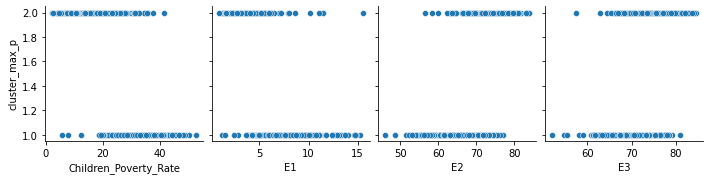

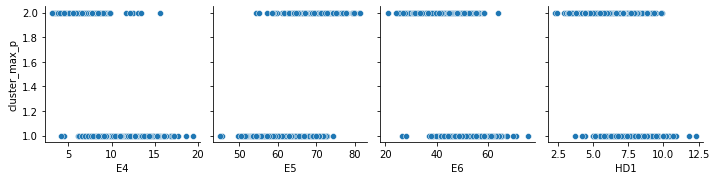

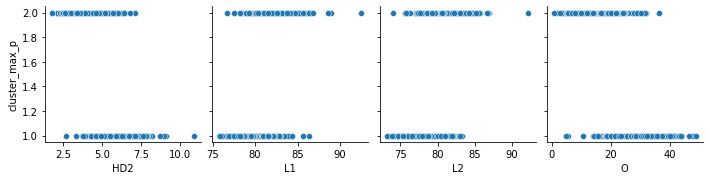

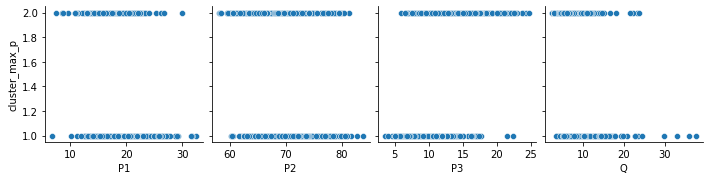

In [7]:
sns.pairplot(df_max_p40, y_vars='cluster_max_p',x_vars=['Children_Poverty_Rate','E1','E2','E3'])

sns.pairplot(df_max_p40, y_vars='cluster_max_p',x_vars=['E4','E5','E6','HD1'])

sns.pairplot(df_max_p40, y_vars='cluster_max_p',x_vars=['HD2','L1','L2','O'])

sns.pairplot(df_max_p40, y_vars='cluster_max_p',x_vars=['P1','P2','P3','Q'])